In [19]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [55]:
df_test = pd.read_csv(r'C:\\Users\\ASUS\\Downloads\\test_data.txt.zip', sep=":::", header = 0, engine = 'python')
df_train = pd.read_csv(r'C:\\Users\\ASUS\Downloads\\train_data.txt.zip', sep=":::", header = 0, engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']

In [49]:
df_test.head()

,SN,movie_name,confession
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [57]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [67]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [69]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [71]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [73]:
df_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [75]:
df_train.count()

SN            54213
movie_name    54213
category      54213
confession    54213
dtype: int64

In [77]:
df_test.count()

SN            54199
movie_name    54199
confession    54199
dtype: int64

In [79]:
df_train.loc[0]

SN                                                            2
movie_name                                        Cupid (1997) 
category                                              thriller 
confession     A brother and sister with a past incestuous r...
Name: 0, dtype: object

In [81]:
df_test.loc[0]

SN                                                            2
movie_name                            La guerra de papá (1977) 
confession     Spain, March 1964: Quico is a very naughty ch...
Name: 0, dtype: object

In [83]:
df_test.shape

(54199, 3)

In [87]:
df_train.shape

(54213, 4)

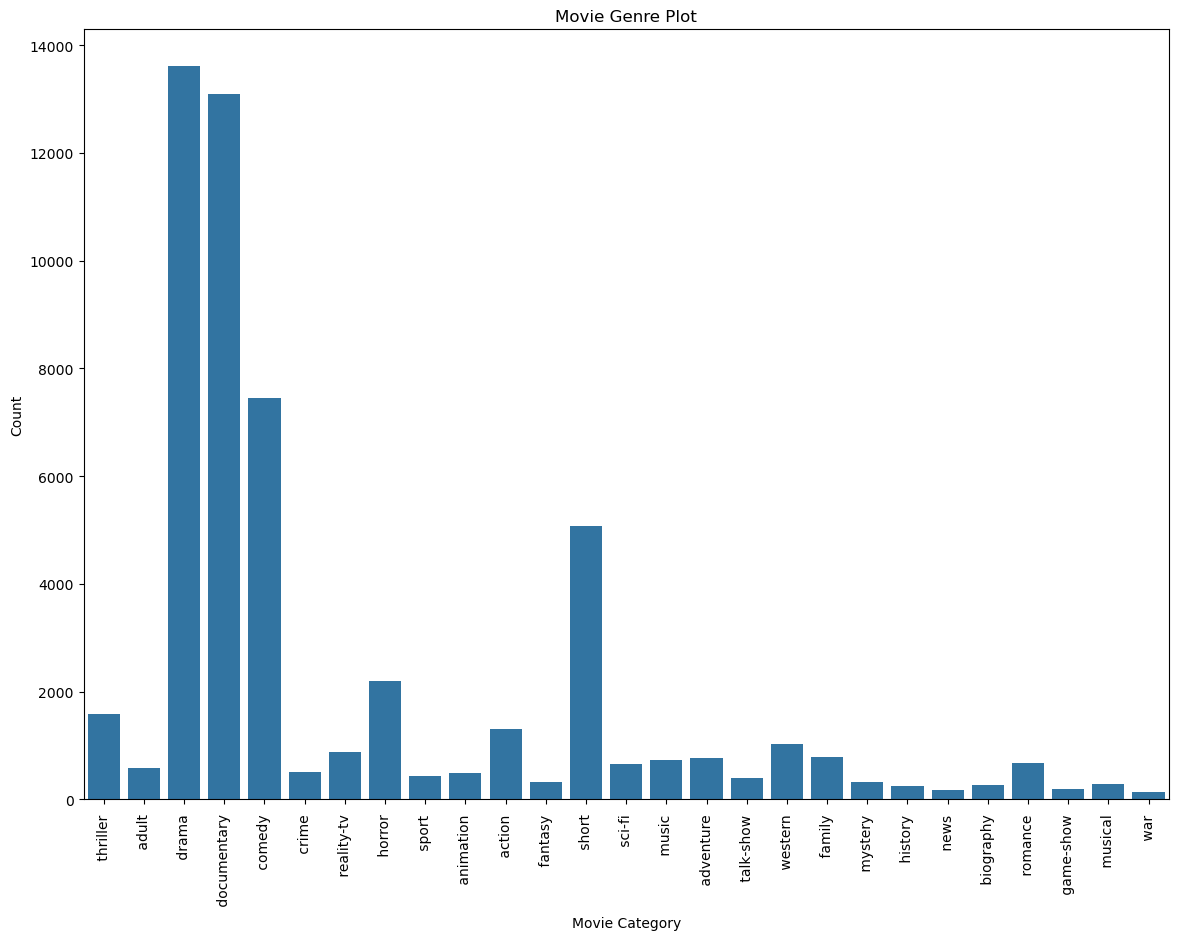

In [99]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

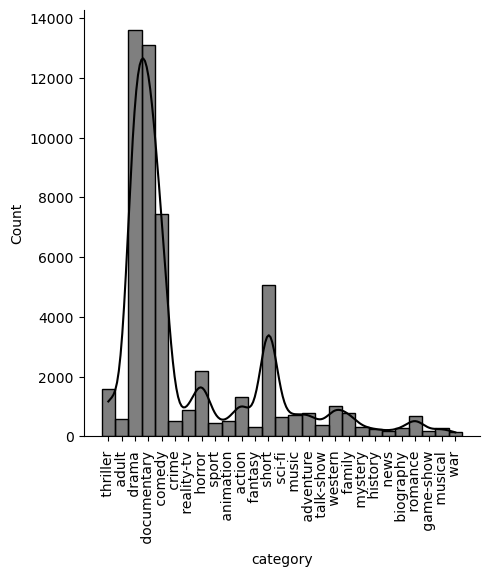

In [101]:
sns.displot(df_train.category, kde= True, color = "black")
plt.xticks(rotation=90);

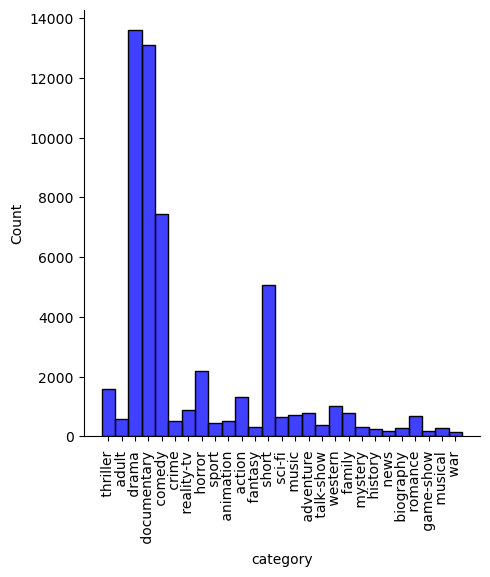

In [105]:
sns.displot(df_train.category, kde=False, color = "blue")
plt.xticks(rotation=90);

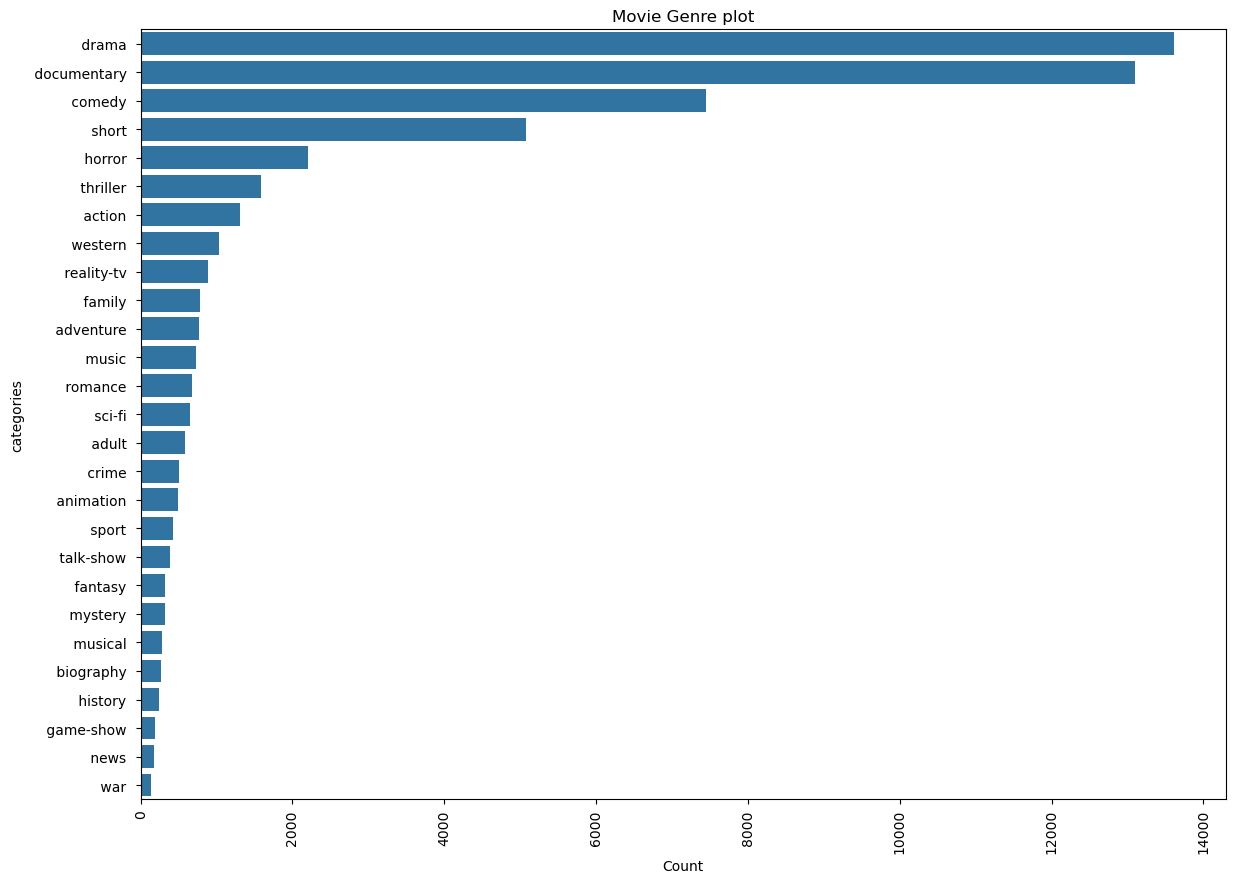

In [117]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('categories')
plt.title('Movie Genre plot')
plt.xticks(rotation=90);
plt.show()

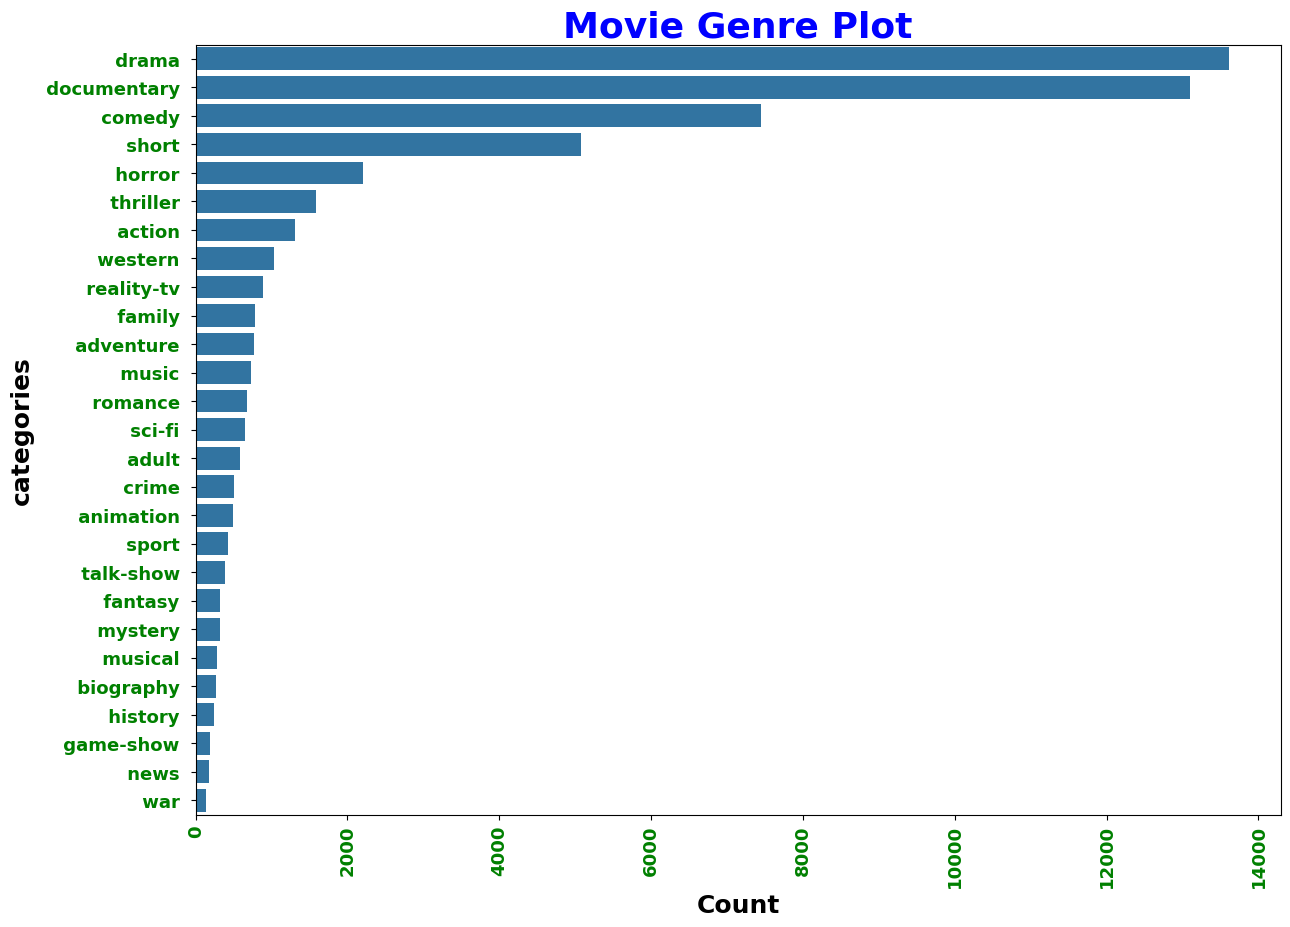

In [121]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count',fontsize = 18, fontweight = 'bold')
plt.ylabel('categories',fontsize = 18, fontweight='bold')
plt.title('Movie Genre Plot', fontsize =26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize =13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize= 13, fontweight = 'bold' , color= 'green')
plt.show()

In [123]:
df_combined = pd.concat([df_train, df_test],axis=0)

In [127]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [129]:
df_combined.shape

(108412, 4)

In [131]:
df_combined.size

433648

In [133]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [135]:
df_combined.count()

SN            108412
movie_name    108412
category       54213
confession    108412
dtype: int64

In [139]:
encoder = LabelEncoder()
df_combined["category"]= encoder.fit_transform(df_combined["category"].values)

In [145]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [143]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),24,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),8,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),8,The film's title refers not only to the un-re...
4,6,Quality Control (2011),7,Quality Control consists of a series of 16mm ...


In [149]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [151]:
df_combined.count()

SN            108412
movie_name    108412
category      108412
confession    108412
dtype: int64

In [153]:
df_combined.duplicated().values.any()

False

In [167]:
vectorizer = TfidfVectorizer()

In [169]:
X = vectorizer.fit_transform(df_combined["confession"])

In [161]:
df_combined.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [171]:
y = df_combined["category"]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
naive_bayes_model = MultinomialNB()

In [183]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [185]:
nb_predictions = naive_bayes_model.predict(X_test)

In [191]:
print("Naive Byes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_score: ", r2_score(y_test, nb_predictions))

Naive Byes Model:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0  

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
